### Perceptron 

Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks.
Perceptron is usually used to classify the data into two parts. Therefore, it is also known as a Linear Binary Classifier.

![img.png](https://miro.medium.com/max/638/0*Oqd1KudKXY3hekj7.)

The perceptron works on these simple steps

*  All the inputs x are multiplied with their weights w. Let’s call it k.

![img.png](https://miro.medium.com/max/875/1*_Zy1C83cnmYUdETCeQrOgA.png)

* Add all the multiplied values and call them Weighted Sum.

![img.png](https://miro.medium.com/max/660/1*xFd9VQnUM1H0kiCENsoYxg.gif)

* Apply that weighted sum to the correct Activation Function.

For Example: Unit Step Activation Function.

![img.png](https://miro.medium.com/max/600/1*0iOzeMS3s-3LTU9hYH9ryg.png)


##### Weights shows the strength of the particular node.
##### A bias value allows you to shift the activation function curve up or down.



#### Resource : 

https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

#### Generating random classifiaction Dataset 

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [37]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [38]:
X[:5], y[:5]

(array([[ -0.53278301,  -1.64847081],
        [ -0.55022637, -11.61661524],
        [  1.38862276,  -1.4358059 ],
        [  1.37033956,  -0.64022071],
        [ -0.88060639,  -9.7094674 ]]),
 array([1, 0, 1, 1, 0]))

In [39]:
X[:,0][:5], X[:,1][:5]

(array([-0.53278301, -0.55022637,  1.38862276,  1.37033956, -0.88060639]),
 array([ -1.64847081, -11.61661524,  -1.4358059 ,  -0.64022071,
         -9.7094674 ]))

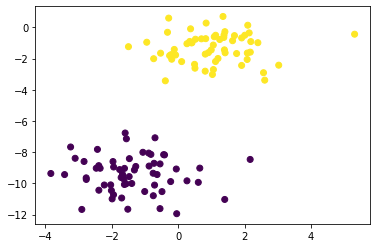

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

In [41]:
import numpy as  np

1. Initialize the weights to 0 or small random numbers.

2. For each training sample x(i):

    * Calculate the output value.

    * Update the weights.

In [42]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])
        for _ in range(self.n_iters): # iterating over number of epochs 
            
            for idx, x_i in enumerate(X): # iterating over one sample

                linear_output = np.dot(x_i, self.weights) + self.bias #linear = w*x+b
                y_predicted = self.activation_func(linear_output) #y_pred = action_func(linear)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted) # upadte = lr*(y_actual-y_pred)
                #all weights in the weight vector are being updated simultaneously.
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [43]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [44]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p

In [45]:
p.fit(X_train, y_train)
predictions = p.predict(X_test)
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


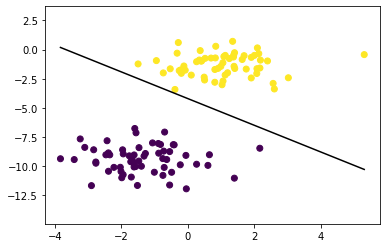

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)


x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()